<a href="https://colab.research.google.com/github/Kozhedu/Car_Moldova/blob/main/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons, make_circles

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

Функциии для построения графиков и  таблиц

In [ ]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [ ]:
def val(y_test, y_pred):
    a_s = accuracy_score(y_test, y_pred).round(2)
    r_c = recall_score(y_test, y_pred).round(2)
    p_c = precision_score(y_test, y_pred).round(2)
    f1 = f1_score(y_test, y_pred).round(2)

    all_models = pd.DataFrame({
    "Показатель" : ["accuracy_score", "recall_score", "precision_score", "f1_score"],
    "Значение" : [a_s, r_c, p_c, f1]
})
    return all_models

In [ ]:
def model (y_test, y_pred):
    sns.set_context(context='paper', font_scale=2, rc=None)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, y_pred).flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Blues')
    ax.set(title = 'Confusion matrix')
    plt.show()

    cm=confusion_matrix(y_test,y_pred)
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]

    print("Модель правильно классифицировала ", TN, " показатель, который принадлежал к классу 0 (истинно отрицательные исходы)")
    print("Модель правильно классифицировала ", TP, " показатель, который принадлежал к классу 1 (истинно положительные исходы)")
    print("Модель ошибочно классифицировала ", FP, " показатель, из класса 0 как класс 1 (ложноположительные исходы)")
    print("Модель ошибочно классифицировала ", FN, " показатель, из класса 1 как класс 0 (ложноотрицательные исходы)")
    print( )
    print('Точность модели = TP+TN/(TP+TN+FP+FN) = ',round((TP+TN)/float(TP+TN+FP+FN),4))
    print('Чувствительность или доля истинно положительных результатов = TP/(TP+FN) = ',round(TP/float(TP+FN),4))
    print('Доля истинно отрицательных результатов = TN/(TN+FP) = ',round(TN/float(TN+FP),4))
    print('Положительное прогностическое значение = TP/(TP+FP) = ',round(TP/float(TP+FP),4))
    print('Отрицательное прогностическое значение = TN/(TN+FN) = ',round(TN/float(TN+FN),4))

In [ ]:
def roc (y_test, y_pred, dens=True):
    probs = y_pred

    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)

    plt.figure()
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot([0, 1], label='Случайное гадание', linestyle='--')
    plt.plot([0,0,1], [0,1,1], lw=2, linestyle=':', color = "black", label = 'Идеальное качество')
    plt.plot(fpr, tpr, label = 'Сглаженные значения ROC-AUC', color='deeppink')
    ax.set_title('Logistic Regression ROC AUC = %0.3f'%roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


# 1. Синтетические данные

## 1.1. Генерация данных - Инь-Ян

In [ ]:
X, y = make_moons(n_samples=400, noise=0.20, random_state=42)

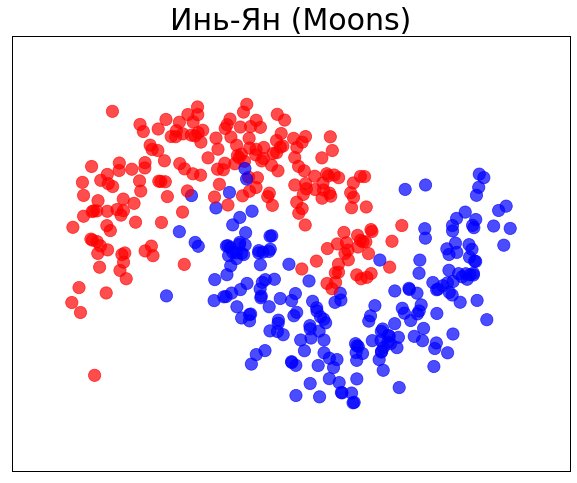

In [ ]:
fig = plt.figure(figsize= (10,8))
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X,y), 'Инь-Ян (Moons)')

### 1.1.1. Модель № 1

Создаем полиномы

In [ ]:
def to_polynom(X, order = 2):
    order_range = range(order, order+1,1)
    out = np.copy(X) 
    for i in order_range:
        out = np.hstack([out, np.power(X,i)])
    return out

In [ ]:
X = to_polynom(X, order = 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
LogReg = LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1, max_iter=100000)

In [ ]:
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(LogReg.score(X_train, y_train)))
print('Оценка тестового набора: {:.4f}'.format(LogReg.score(X_test, y_test)))

val(y_test, y_pred)

Оценка обучающего набора: 0.8429
Оценка тестового набора: 0.8250


,Показатель,Значение
0,accuracy_score,0.82
1,recall_score,0.80
2,precision_score,0.84
3,f1_score,0.82


Оценка точности обучающего набора и точность тестового набора вполне сопоставимы -  о переобучении речи не идет. 

В целом результат работы модели очень неплох. Посмотрим на граффик матрицы несоответсвий.

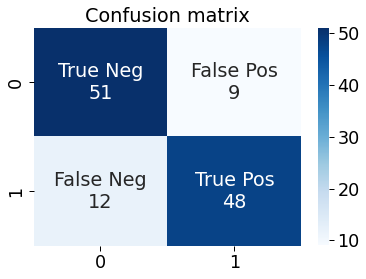

Модель правильно классифицировала  51  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  48  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  9  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  12  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.825
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.8
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.85
Положительное прогностическое значение = TP/(TP+FP) =  0.8421
Отрицательное прогностическое значение = TN/(TN+FN) =  0.8095


In [ ]:
model(y_test, y_pred)

Модель корректно классифицировала 59 данных - которые относятся к классу 0 (истинно отрицательные) и 56 данных - которые принадлежат к классу 1 (истинно положительные).

При этом модель ошибочно классифицировала 4 образцов из класса 0 как класс 1 (ложноположительные исходы) и предсказала, что 1 образцов из класса 1 как класс 0 (ложноотрицательные исходы).

<Figure size 432x288 with 0 Axes>

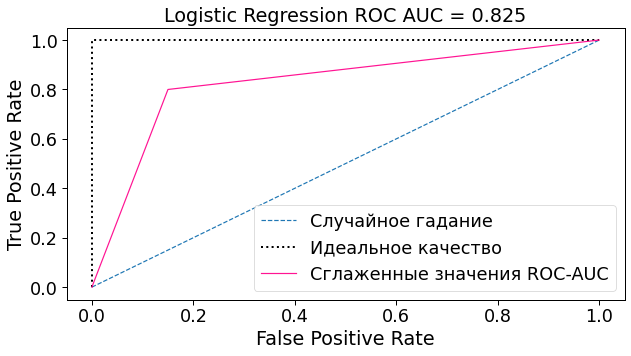

In [ ]:
roc(y_test, y_pred)

Кривая ROC, так-же указывает, что модель работает хоть и не идельно, но все-же лучше, чем случайное гадание.

### 1.1.2. Модель № 2

In [ ]:
X2 = to_polynom(X, order = 4)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)

In [ ]:
LogReg2 = LogisticRegression(fit_intercept=True, penalty='l1', solver='saga', C=10, max_iter=100000)

In [ ]:
LogReg2.fit(X_train2, y_train2)
y_pred2 = LogReg2.predict(X_test2)

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(LogReg2.score(X_train2, y_train2)))
print('Оценка тестового набора: {:.4f}'.format(LogReg2.score(X_test2, y_test2)))

val(y_test2, y_pred2)

Оценка обучающего набора: 0.8643
Оценка тестового набора: 0.8667


,Показатель,Значение
0,accuracy_score,0.87
1,recall_score,0.75
2,precision_score,0.98
3,f1_score,0.85


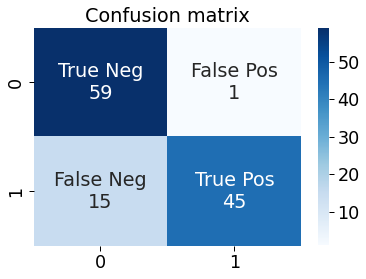

Модель правильно классифицировала  59  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  45  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  1  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  15  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.8667
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.75
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.9833
Положительное прогностическое значение = TP/(TP+FP) =  0.9783
Отрицательное прогностическое значение = TN/(TN+FN) =  0.7973


In [ ]:
model(y_test2, y_pred2)

<Figure size 432x288 with 0 Axes>

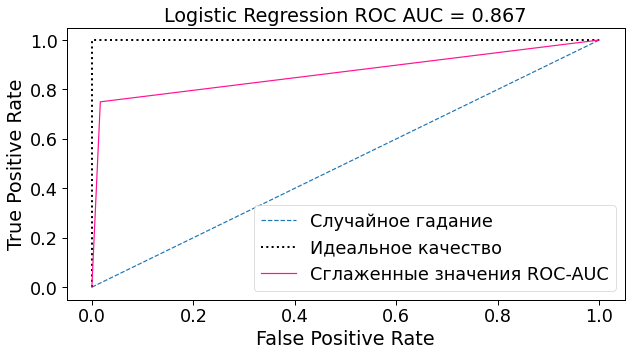

In [ ]:
roc(y_test2, y_pred2)

После внесения изменений модель стала работать немного лучше

## 1.2. Генерация данных - Круги

In [ ]:
X_k, y_k = make_circles(n_samples=400, noise=0.09, random_state=42)

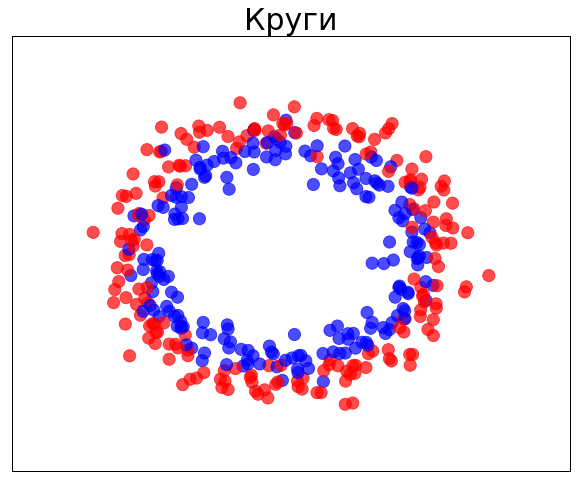

In [ ]:
fig = plt.figure(figsize= (10,8))
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X_k, y_k), 'Круги')

### 1.2.1. Модель № 1

In [ ]:
X_k_p = to_polynom(X_k, order = 2)

In [ ]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k_p, y_k, test_size=0.3, random_state=42)

In [ ]:
LogReg_k = LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1.5, max_iter=100000)

In [ ]:
LogReg_k.fit(X_train_k, y_train_k)
y_pred_k = LogReg_k.predict(X_test_k)

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(LogReg_k.score(X_train_k, y_train_k)))
print('Оценка тестового набора: {:.4f}'.format(LogReg_k.score(X_test_k, y_test_k)))

val(y_test_k, y_pred_k)

Оценка обучающего набора: 0.8821
Оценка тестового набора: 0.8333


,Показатель,Значение
0,accuracy_score,0.83
1,recall_score,0.83
2,precision_score,0.83
3,f1_score,0.83


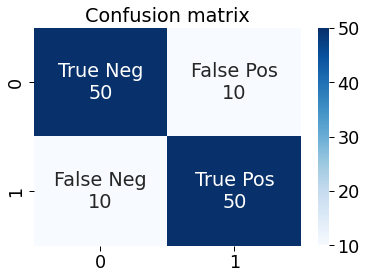

Модель правильно классифицировала  50  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  50  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  10  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  10  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.8333
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.8333
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.8333
Положительное прогностическое значение = TP/(TP+FP) =  0.8333
Отрицательное прогностическое значение = TN/(TN+FN) =  0.8333


In [ ]:
model(y_test_k, y_pred_k)

<Figure size 432x288 with 0 Axes>

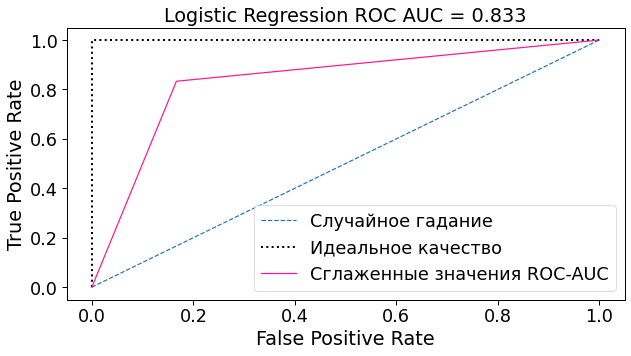

In [ ]:
roc(y_test_k, y_pred_k)

Модель работает неплохо. Попробуем отрегулировать полиномы и параметры модели

### 1.2.2. Модель № 2

In [ ]:
X_k_p2 = to_polynom(X_k, order = 4)

In [ ]:
X_train_k2, X_test_k2, y_train_k2, y_test_k2 = train_test_split(X_k_p2, y_k, test_size=0.3, random_state=42)

In [ ]:
LogReg_k2 = LogisticRegression(fit_intercept=True, penalty='l1', solver='saga', C=10, max_iter=100000)

In [ ]:
LogReg_k2.fit(X_train_k2, y_train_k2)
y_pred_k2 = LogReg_k2.predict(X_test_k2)

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(LogReg_k2.score(X_train_k2, y_train_k2)))
print('Оценка тестового набора: {:.4f}'.format(LogReg_k2.score(X_test_k2, y_test_k2)))

val(y_test_k2, y_pred_k2)

Оценка обучающего набора: 0.8143
Оценка тестового набора: 0.7583


,Показатель,Значение
0,accuracy_score,0.76
1,recall_score,0.80
2,precision_score,0.74
3,f1_score,0.77


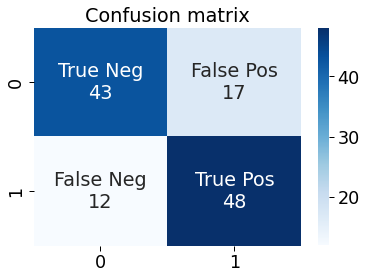

Модель правильно классифицировала  43  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  48  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  17  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  12  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.7583
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.8
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.7167
Положительное прогностическое значение = TP/(TP+FP) =  0.7385
Отрицательное прогностическое значение = TN/(TN+FN) =  0.7818


In [ ]:
model(y_test_k2, y_pred_k2)

<Figure size 432x288 with 0 Axes>

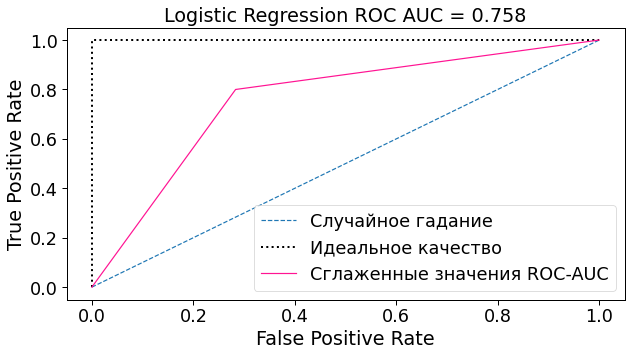

In [ ]:
roc(y_test_k2, y_pred_k2)

После внесения корректировой модель стала работать значительно хуже

# 2. Набор данных Cars Moldova

In [ ]:
df_i = pd.read_csv("cars_moldova_categor.csv") #очищенных от дубликатов и выбросов, с добавленными признаками из «Задания 1»
df_i

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,high_mileage,3091,9629.435781
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,average_mileage,2371,6624.550822
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,little_mileage,2371,6624.550822
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,average_mileage,1867,4169.550080
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,average_mileage,3032,12960.053100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32469,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667,average_mileage,3450,6839.976522
32470,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000,little_mileage,288,22631.614583
32471,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714,average_mileage,1348,5327.074926
32472,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000,high_mileage,444,5145.808559


In [ ]:
df = df_i.copy()

Разбиваем на категориальные и числовые колонки

In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission' ,"km_year_q"] 
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', "Age", 'km_year',"Make_val","Price_mean_make"]

df_num = df[num_columns].copy()

Кодируем категориальные данные

In [ ]:
df[cat_columns] = df[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df[column_name] =  df[column_name].cat.codes
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
0,41,541,2011,4,195000.0,1800.0,2,0,7750.0,11,17727.272727,1,3091,9629.435781
1,33,364,2014,11,135000.0,1500.0,0,1,8550.0,8,16875.000000,0,2371,6624.550822
2,33,425,2012,11,110000.0,1500.0,0,1,6550.0,10,11000.000000,2,2371,6624.550822
3,28,139,2006,11,200000.0,1600.0,3,1,4100.0,16,12500.000000,0,1867,4169.550080
4,23,731,2000,5,300000.0,2200.0,0,1,3490.0,22,13636.363636,0,3032,12960.053100


## 2.1. Mодель логистической регрессии

Pазбиваем на тестовую и тренировочную

In [ ]:

X = df[num_columns]
y = df['Transmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Строим модель

In [ ]:
Log= LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1, max_iter=100000)

In [ ]:
Log.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=100000, solver='saga')

Смотрим результат

In [ ]:
y_pr = Log.predict(X_test)

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(Log.score(X_train, y_train)))
print('Оценка тестового набора: {:.4f}'.format(Log.score(X_test, y_test)))


Оценка обучающего набора: 0.8060
Оценка тестового набора: 0.8067


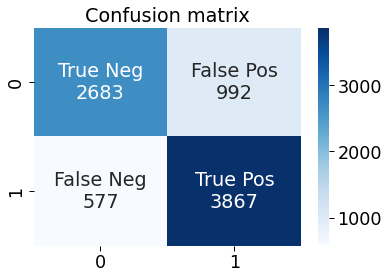

Модель правильно классифицировала  2683  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  3867  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  992  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  577  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.8067
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.8702
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.7301
Положительное прогностическое значение = TP/(TP+FP) =  0.7958
Отрицательное прогностическое значение = TN/(TN+FN) =  0.823


In [ ]:
model(y_test, y_pr)

In [ ]:
print (classification_report(y_test, y_pr, target_names=['Manual','Automatic']))

              precision    recall  f1-score   support

      Manual       0.82      0.73      0.77      3675
   Automatic       0.80      0.87      0.83      4444

    accuracy                           0.81      8119
   macro avg       0.81      0.80      0.80      8119
weighted avg       0.81      0.81      0.81      8119



## 2.2. Различные типы предварительной обработки

### 2.2.1. Стандартизация

In [ ]:
df_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-M)/STD

df_scaled.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
0,41,541,0.383647,4,0.142253,-0.110171,2,0,-0.174700,-0.383647,0.389158,1,1.104635,0.050383
1,33,364,0.797815,11,-0.471631,-0.602326,0,1,-0.090635,-0.797815,0.274376,0,0.429772,-0.647607
2,33,425,0.521703,11,-0.727415,-0.602326,0,1,-0.300796,-0.521703,-0.516855,2,0.429772,-0.647607
3,28,139,-0.306631,11,0.193409,-0.438275,3,1,-0.558242,0.306631,-0.314839,0,-0.042632,-1.217868
4,23,731,-1.134966,5,1.216548,0.546035,0,1,-0.622341,1.134966,-0.161796,0,1.049334,0.824036


In [ ]:
X1 = df_scaled[num_columns].values 
y1 = df_scaled["Transmission"].values 
features_names = df_scaled[num_columns].columns

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)


scaler  = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test  = scaler.transform(X1_test) 
pd.DataFrame(X1_train).tail()

,0,1,2,3,4,5,6,7
24350,0.64,0.269999,0.687500,0.043086,0.36,0.284196,0.353436,0.226527
24351,0.88,0.050999,0.375000,0.148297,0.12,0.145697,0.450855,0.240927
24352,0.78,0.194999,0.375000,0.096192,0.22,0.324986,0.043491,0.121252
24353,0.60,0.002499,0.520833,0.023046,0.40,0.002361,0.878805,0.250410
24354,0.48,0.284666,0.374375,0.024048,0.52,0.210849,0.027544,0.032811


Строим модель

In [ ]:
Log1= LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1, max_iter=100000)

In [ ]:
Log1.fit(X1_train, y1_train)

LogisticRegression(C=1, max_iter=100000, solver='saga')

In [ ]:
y1_pred = Log1.predict(X1_test)

Смотрим результат

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(Log1.score(X1_train, y1_train)))
print('Оценка тестового набора: {:.4f}'.format(Log1.score(X1_test, y1_test)))

Оценка обучающего набора: 0.8124
Оценка тестового набора: 0.8173


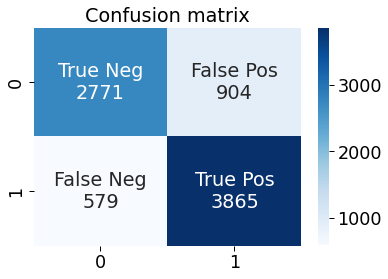

Модель правильно классифицировала  2771  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  3865  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  904  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  579  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.8173
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.8697
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.754
Положительное прогностическое значение = TP/(TP+FP) =  0.8104
Отрицательное прогностическое значение = TN/(TN+FN) =  0.8272


In [ ]:
model(y1_test, y1_pred)

In [ ]:
print (classification_report(y1_test, y1_pred, target_names=['Manual','Automatic']))

              precision    recall  f1-score   support

      Manual       0.83      0.75      0.79      3675
   Automatic       0.81      0.87      0.84      4444

    accuracy                           0.82      8119
   macro avg       0.82      0.81      0.81      8119
weighted avg       0.82      0.82      0.82      8119



### 2.2.2. Нормализация

In [ ]:
df_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)
df_norm.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
0,41,541,0.80,4,0.194999,0.333333,2,0,0.075651,0.20,0.354533,1,0.895912,0.178389
1,33,364,0.86,11,0.134999,0.270833,0,1,0.083667,0.14,0.337487,0,0.687156,0.113412
2,33,425,0.82,11,0.109999,0.270833,0,1,0.063627,0.18,0.219984,2,0.687156,0.113412
3,28,139,0.70,11,0.199999,0.291667,3,1,0.039078,0.30,0.249985,0,0.541026,0.060325
4,23,731,0.58,5,0.299999,0.416667,0,1,0.032966,0.42,0.272713,0,0.878805,0.250410


In [ ]:

X2 = df_norm[num_columns].values 
y2 = df_norm["Transmission"].values 
features_names = df_norm[num_columns].columns

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test  = scaler.transform(X2_test) 
pd.DataFrame(X2_train).tail()

,0,1,2,3,4,5,6,7
22726,0.64,0.269999,0.687500,0.043086,0.36,0.284196,0.353436,0.226527
22727,0.88,0.050999,0.375000,0.148297,0.12,0.145697,0.450855,0.240927
22728,0.78,0.194999,0.375000,0.096192,0.22,0.324986,0.043491,0.121252
22729,0.60,0.002499,0.520833,0.023046,0.40,0.002361,0.878805,0.250410
22730,0.48,0.284666,0.374375,0.024048,0.52,0.210849,0.027544,0.032811


Строим модель

In [ ]:
Log2= LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1, max_iter=100000)

In [ ]:
Log2.fit(X2_train, y2_train)

LogisticRegression(C=1, max_iter=100000, solver='saga')

In [ ]:
y2_pred = Log2.predict(X2_test)

Смотрим результат

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(Log2.score(X2_train, y2_train)))
print('Оценка тестового набора: {:.4f}'.format(Log2.score(X2_test, y2_test)))

Оценка обучающего набора: 0.8119
Оценка тестового набора: 0.8166


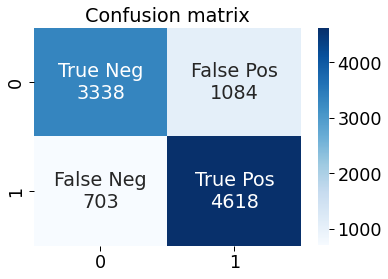

Модель правильно классифицировала  3338  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  4618  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  1084  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  703  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.8166
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.8679
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.7549
Положительное прогностическое значение = TP/(TP+FP) =  0.8099
Отрицательное прогностическое значение = TN/(TN+FN) =  0.826


In [ ]:
model(y2_test, y2_pred)

In [ ]:
print (classification_report(y2_test, y2_pred, target_names=['Manual','Automatic']))

              precision    recall  f1-score   support

      Manual       0.83      0.75      0.79      4422
   Automatic       0.81      0.87      0.84      5321

    accuracy                           0.82      9743
   macro avg       0.82      0.81      0.81      9743
weighted avg       0.82      0.82      0.82      9743



### 2.2.3. Добавление категориальных признаков

In [ ]:
df_oh = df_i.copy()
df_oh

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,high_mileage,3091,9629.435781
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,average_mileage,2371,6624.550822
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,little_mileage,2371,6624.550822
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,average_mileage,1867,4169.550080
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,average_mileage,3032,12960.053100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32469,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667,average_mileage,3450,6839.976522
32470,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000,little_mileage,288,22631.614583
32471,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714,average_mileage,1348,5327.074926
32472,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000,high_mileage,444,5145.808559


In [ ]:
cat_columns_oh = ['Make', 'Model', 'Style', 'Fuel_type'] 

In [ ]:
df_dum = df_oh.copy()
df_dum = pd.get_dummies(df_dum[cat_columns_oh])
df_dum

,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,Make_Chrysler,Make_Citroen,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32469,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32471,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
32472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_dum['Year'] = df_scaled['Year']
df_dum['Distance'] = df_scaled['Distance']
df_dum['Engine_capacity(cm3)'] = df_scaled['Engine_capacity(cm3)']
df_dum['Price(euro)'] = df_scaled['Price(euro)']
df_dum['km_year'] = df_scaled['km_year']
df_dum['Price_mean_make'] = df_scaled['Price_mean_make']
df_dum['Transmission'] = df_scaled['Transmission']
df_dum.head(2)

,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,Make_Chrysler,Make_Citroen,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,...,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Year,Distance,Engine_capacity(cm3),Price(euro),km_year,Price_mean_make,Transmission
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.383647,0.142253,-0.110171,-0.174700,0.389158,0.050383,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.797815,-0.471631,-0.602326,-0.090635,0.274376,-0.647607,1


Разбиваем данные на тестовую и тренировочную выборки

In [ ]:
X,y = df_dum.drop(columns = ['Transmission']).values,df_dum['Transmission'].values
features_names = df_dum.drop(columns = ['Transmission']).columns

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test  = scaler.transform(X3_test) 
pd.DataFrame(X3_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,841,842,843,844,845,846,847,848,849,850
22726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.64,0.269999,0.687500,0.043086,0.284196,0.226527
22727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.88,0.050999,0.375000,0.148297,0.145697,0.240927
22728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.78,0.194999,0.375000,0.096192,0.324986,0.121252
22729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.60,0.002499,0.520833,0.023046,0.002361,0.250410
22730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.48,0.284666,0.374375,0.024048,0.210849,0.032811


Строим модель

In [ ]:
Log3= LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1, max_iter=100000)

In [ ]:
Log3.fit(X3_train, y3_train)

LogisticRegression(C=1, max_iter=100000, solver='saga')

In [ ]:
y3_pred = Log3.predict(X3_test)

Смотрим результат

In [ ]:
print('Оценка обучающего набора: {:.4f}'.format(Log3.score(X3_train, y3_train)))
print('Оценка тестового набора: {:.4f}'.format(Log3.score(X3_test, y3_test)))

Оценка обучающего набора: 0.8602
Оценка тестового набора: 0.8602


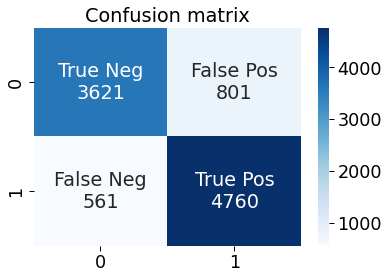

Модель правильно классифицировала  3621  показатель, который принадлежал к классу 0 (истинно отрицательные исходы)
Модель правильно классифицировала  4760  показатель, который принадлежал к классу 1 (истинно положительные исходы)
Модель ошибочно классифицировала  801  показатель, из класса 0 как класс 1 (ложноположительные исходы)
Модель ошибочно классифицировала  561  показатель, из класса 1 как класс 0 (ложноотрицательные исходы)

Точность модели = TP+TN/(TP+TN+FP+FN) =  0.8602
Чувствительность или доля истинно положительных результатов = TP/(TP+FN) =  0.8946
Доля истинно отрицательных результатов = TN/(TN+FP) =  0.8189
Положительное прогностическое значение = TP/(TP+FP) =  0.856
Отрицательное прогностическое значение = TN/(TN+FN) =  0.8659


In [ ]:
model(y3_test, y3_pred)

In [ ]:
print (classification_report(y3_test, y3_pred, target_names=['Manual','Automatic']))

              precision    recall  f1-score   support

      Manual       0.87      0.82      0.84      4422
   Automatic       0.86      0.89      0.87      5321

    accuracy                           0.86      9743
   macro avg       0.86      0.86      0.86      9743
weighted avg       0.86      0.86      0.86      9743



Выводы - модель лучше всего показала себя при one-hot кодировании